## Name : Reddipaku Venkata Nagarjuna
## Task-2 - Linear Regression 
## Predicting the student score based on thier study hours
## The Sparks Foundation

In [40]:
#Importing libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import statsmodels.api as s
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

%matplotlib inline

In [22]:
#Reading data from external link

data = pd.read_csv('http://bit.ly/w-data')


In [41]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [42]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Plotting data points on a 2-D graph to visualize the data and find a relationship between the data.

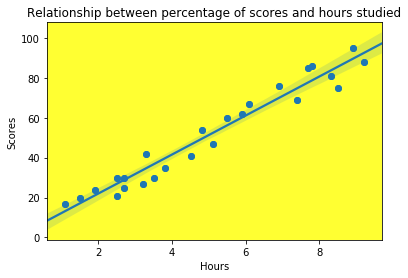

In [27]:
import seaborn as sns
x = data['Hours']
y = data['Scores']
plt.scatter(x, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Relationship between percentage of scores and hours studied')
sns.regplot(x,y,fit_reg=True)
plt.rcParams['axes.facecolor'] = '#FFFF32'
plt.show()


### Plotting a heatmap to show the correlation between data

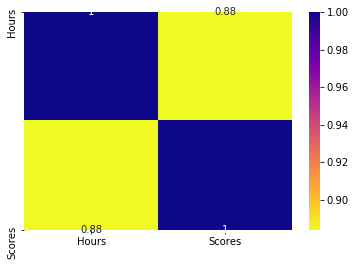

Map shows there is approximately 96% corellation between Hours and Studies


In [28]:
relation = data.corr(method ='kendall')
sns.heatmap(relation, annot=True, cmap='plasma_r')
plt.show()
print('Map shows there is approximately 96% corellation between Hours and Studies')

### OLS regression to find the accuracy of this regression relationship

In [30]:

x=s.add_constant(x)
model1=s.OLS(y,x)
result1=model1.fit()
print(result1.summary())
print("We see that the value of R-squared is 0.953 which is very close to 1. Hence the vaiability is 95.3% or the model is 95.3% accurate as predicted by heatmap")


                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 07 Oct 2020   Prob (F-statistic):           9.13e-17
Time:                        15:35:14   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

### Forming attributes and labels and training the model

In [31]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

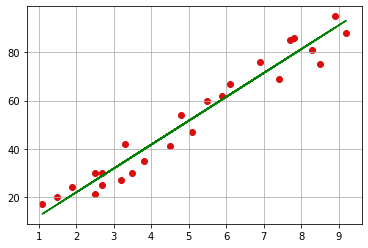

(array([9.91065648]), 2.018160041434683)

In [33]:
line = model.coef_ * x + model.intercept_
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(x, y, color = '#db0d0d')
plt.plot(x, line, color = 'Green')
plt.grid()
plt.show()
model.coef_, model.intercept_

In [34]:
y_pred = model.predict(x_test)
print(y_pred)
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
print(pred_data)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


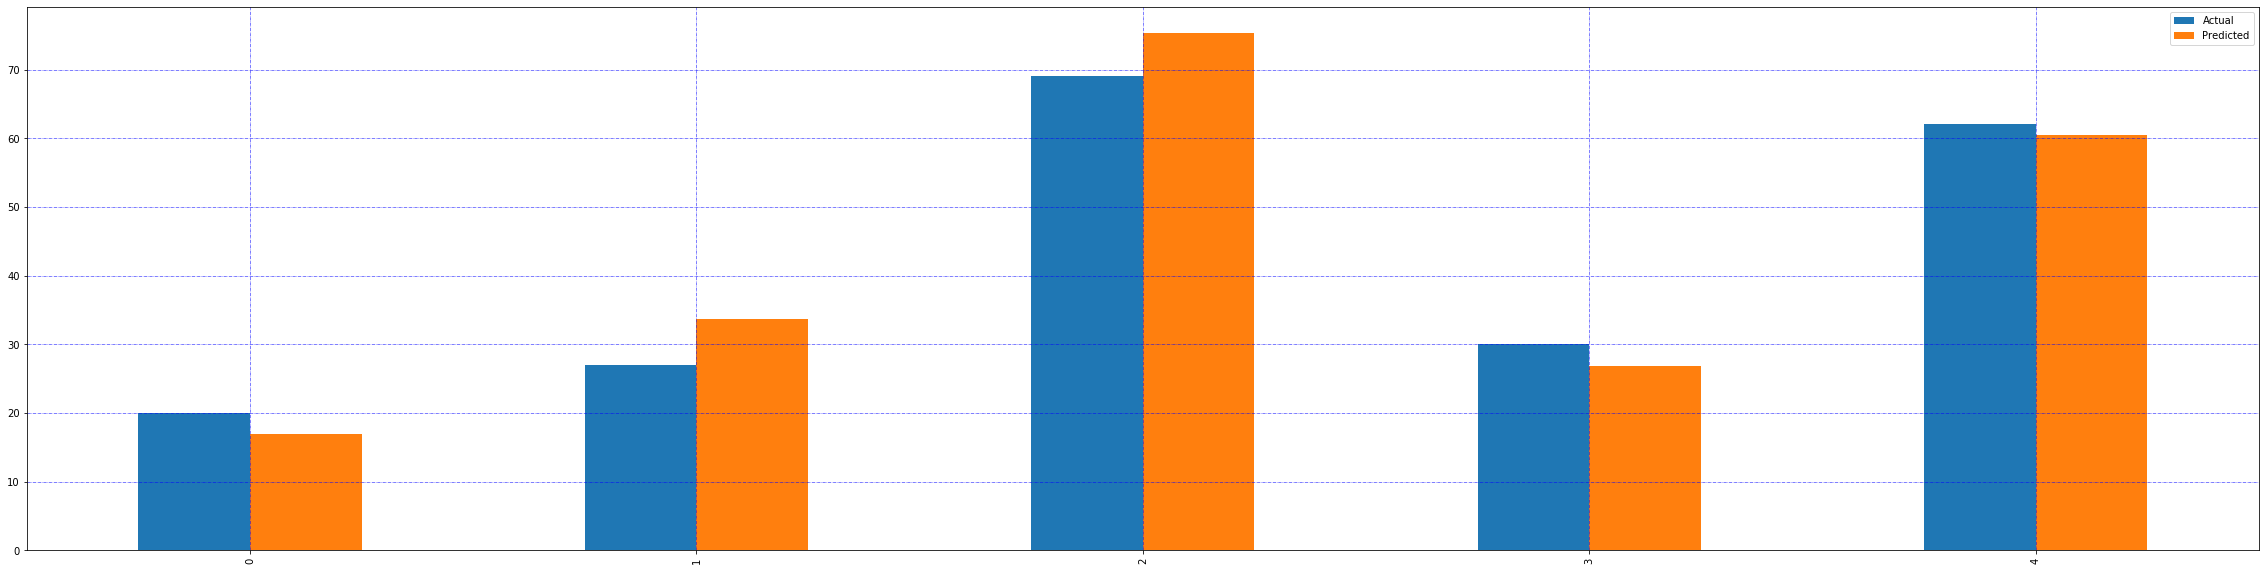

In [35]:
graph = pred_data.head()
graph.plot(kind='bar',figsize=(40,10))
plt.grid(which = 'both', color='blue', linestyle='-.', linewidth=0.5)
plt.show()

In [36]:
print(f'The train score: {model.score(x_train,y_train)}')
print(f'The test score: {model.score(x_test,y_test)}')

The train score: 0.9515510725211553
The test score: 0.9454906892105356


# if student 9.25 hours daily 

In [38]:

hours = [[9.25]]
pred = model.predict(hours)
print ("Number of hours :{}".format(hours))
print ("Grades :{}".format(pred))

Number of hours :[[9.25]]
Grades :[93.69173249]


In [39]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Squared Error:  4.6474476121003665
Explained Variance Score:  0.9482829156738147


#### Thank you